# 1. Importing the necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 2. Loading  the dataset

In [20]:
df = pd.read_csv('C:\\Users\\Narokwe\\Documents\\marketing_AB.csv')

 # 3. Performing Exploratory Data Analysis (EDA)

# 3.1 Displaying the first few rows of the dataset

In [21]:
print(df.head())

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


# 3.2 Checking the summary statistics

In [22]:
print(df.describe())

          Unnamed: 0       user id      total ads  most ads hour
count  588101.000000  5.881010e+05  588101.000000  588101.000000
mean   294050.000000  1.310692e+06      24.820876      14.469061
std    169770.279667  2.022260e+05      43.715181       4.834634
min         0.000000  9.000000e+05       1.000000       0.000000
25%    147025.000000  1.143190e+06       4.000000      11.000000
50%    294050.000000  1.313725e+06      13.000000      14.000000
75%    441075.000000  1.484088e+06      27.000000      18.000000
max    588100.000000  1.654483e+06    2065.000000      23.000000


# 3.3 Checking for missing values

In [23]:
print(df.isnull().sum())

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


# 4. Conducting the A/B test

# 4.1 Extracting data for control (PSA) and test (ad) groups

In [24]:
control_group = df[df['test group'] == 'psa']['converted']
test_group = df[df['test group'] == 'ad']['converted']

# 4.2 Performing a two-sample t-test

In [25]:
t_stat, p_value = stats.ttest_ind(control_group, test_group)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -7.37040597428566, p-value: 1.7033052627831264e-13


# 5. Analyzing the results using statistical techniques

# 5.1 Checking for statistical significance

In [26]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the groups.")
    if control_group.mean() < test_group.mean():
        print("Test group (ad) has a higher conversion rate.")
    else:
        print("Control group (PSA) has a higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the groups.")


Reject the null hypothesis: There is a statistically significant difference between the groups.
Test group (ad) has a higher conversion rate.


# 6. Drawing actionable insights

# Increase investment in advertising: Since the test group (ad) showed a higher conversion rate, it indicates that the advertising campaign was effective in driving conversions. Therefore, it would be advisable to allocate more resources and budget towards advertising efforts.

# 7. Converting 'converted' column to numeric values

In [28]:
df['converted_numeric'] = df['converted'].astype(int)

# 8. Visualizing the data

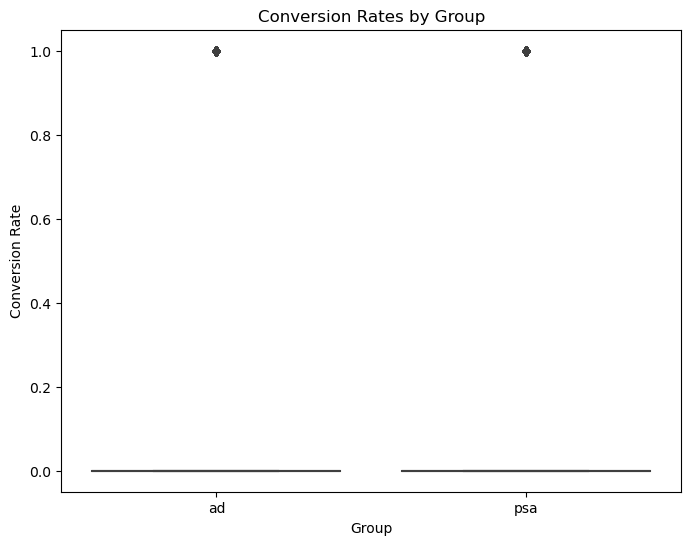

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='test group', y='converted_numeric', data=df)
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()